In [80]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [81]:
!git clone https://github.com/KhadijaBenhamida/Heart-Disease-Classification-with-Deep-Neural-Networks-DNN-.git


Cloning into 'Heart-Disease-Classification-with-Deep-Neural-Networks-DNN-'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 50.01 KiB | 12.50 MiB/s, done.


In [82]:
%cd Heart-Disease-Classification-with-Deep-Neural-Networks-DNN-


/content/Heart-Disease-Classification-with-Deep-Neural-Networks-DNN-/Heart-Disease-Classification-with-Deep-Neural-Networks-DNN-/Heart-Disease-Classification-with-Deep-Neural-Networks-DNN-


In [83]:
!git config --global user.email "khadija.benhamida2003@gmail.com"
!git config --global user.name "KhadijaBenhamida"


In [ ]:
from google.colab import files
files.upload()


In [85]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [86]:
!kaggle competitions download -c heart-disease-predictor-xm


heart-disease-predictor-xm.zip: Skipping, found more recently modified local copy (use --force to force download)


In [87]:
import zipfile
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Unzipping the dataset
data_path = '/content/heart-disease-predictor-xm.zip'
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall('/content/heart_disease')

# Listing files in the extracted folder
extracted_files = os.listdir('/content/heart_disease')
print(extracted_files)

# Load the desired CSV file
train= pd.read_csv('/content/heart_disease/heart_disease_train.csv')
test=pd.read_csv('/content/heart_disease/heart_disease_test.csv')
print(train.head())
print(test.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['heart_disease_test.csv', 'heart_disease_train.csv', 'sample_submission.csv']
   ID        age  sex  chest.pain.type  resting.bp.s  cholesterol  \
0   1  65.686292    1                3    126.893714   215.554443   
1   2  62.924402    1                4    113.693185     0.000000   
2   3  46.704774    1                1    121.400796   183.622255   
3   4  53.629913    1                4    116.884710     0.000000   
4   5  54.890007    1                4    155.011496   284.164758   

   fasting.blood.sugar  resting.ecg  max.heart.rate  exercise.angina  oldpeak  \
0                    0            2      143.154463                0      0.4   
1                    1            0       74.825992                1     -0.5   
2                    0            2      166.837456                0      1.9   
3                    0            0      121.063818  

In [88]:
print(train.isnull().sum())

ID                     0
age                    0
sex                    0
chest.pain.type        0
resting.bp.s           0
cholesterol            0
fasting.blood.sugar    0
resting.ecg            0
max.heart.rate         0
exercise.angina        0
oldpeak                0
ST.slope               0
target                 0
dtype: int64


In [89]:
print(train.duplicated().unique())

[False]


In [90]:
train.describe()

,ID,age,sex,chest.pain.type,resting.bp.s,cholesterol,fasting.blood.sugar,resting.ecg,max.heart.rate,exercise.angina,oldpeak,ST.slope,target
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,476.500000,54.025861,0.745798,3.233193,132.039039,208.949319,0.214286,0.713235,139.567426,0.413866,0.934559,1.650210,0.529412
std,274.963028,9.846800,0.435640,0.945536,18.954234,97.121300,0.410542,0.872957,27.436312,0.492784,1.109046,0.617413,0.499397
min,1.000000,25.760059,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,57.565330,0.000000,-2.600000,1.000000,0.000000
25%,238.750000,47.710891,0.000000,3.000000,119.888401,192.472305,0.000000,0.000000,119.668837,0.000000,0.000000,1.000000,0.000000
50%,476.500000,54.619793,1.000000,4.000000,130.280023,229.937612,0.000000,0.000000,141.495805,0.000000,0.650000,2.000000,1.000000
75%,714.250000,60.675119,1.000000,4.000000,142.740252,266.425060,0.000000,2.000000,159.906661,1.000000,1.500000,2.000000,1.000000
max,952.000000,88.750887,1.000000,4.000000,200.689910,533.644516,1.000000,2.000000,202.226598,1.000000,6.200000,3.000000,1.000000


In [91]:
train.columns

Index(['ID', 'age', 'sex', 'chest.pain.type', 'resting.bp.s', 'cholesterol',
       'fasting.blood.sugar', 'resting.ecg', 'max.heart.rate',
       'exercise.angina', 'oldpeak', 'ST.slope', 'target'],
      dtype='object')

In [92]:
train.head()

,ID,age,sex,chest.pain.type,resting.bp.s,cholesterol,fasting.blood.sugar,resting.ecg,max.heart.rate,exercise.angina,oldpeak,ST.slope,target
0,1,65.686292,1,3,126.893714,215.554443,0,2,143.154463,0,0.4,2,1
1,2,62.924402,1,4,113.693185,0.000000,1,0,74.825992,1,-0.5,2,1
2,3,46.704774,1,1,121.400796,183.622255,0,2,166.837456,0,1.9,2,0
3,4,53.629913,1,4,116.884710,0.000000,0,0,121.063818,1,1.5,2,1
4,5,54.890007,1,4,155.011496,284.164758,0,2,123.211739,1,0.6,2,1


In [93]:
from sklearn.preprocessing import StandardScaler
numeric_cols=['age', 'resting.bp.s', 'cholesterol', 'max.heart.rate', 'oldpeak']
scaler=StandardScaler()
train[numeric_cols]=scaler.fit_transform(train[numeric_cols])
train.head()

,ID,age,sex,chest.pain.type,resting.bp.s,cholesterol,fasting.blood.sugar,resting.ecg,max.heart.rate,exercise.angina,oldpeak,ST.slope,target
0,1,1.184807,1,3,-0.271603,0.068045,0,2,0.130809,0,-0.482252,2,1
1,2,0.904174,1,4,-0.968411,-2.152557,1,0,-2.360939,1,-1.294187,2,1
2,3,-0.743890,1,1,-0.561554,-0.260915,0,2,0.994462,0,0.870973,2,0
3,4,-0.040232,1,4,-0.799942,-2.152557,0,0,-0.674775,1,0.510113,2,1
4,5,0.087805,1,4,1.212633,0.774856,0,2,-0.596446,1,-0.301822,2,1


In [94]:
x=train.drop(columns=['ID','target'])
y=train['target']

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)

(761, 11) (191, 11)


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8743455497382199
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        87
           1       0.90      0.87      0.88       104

    accuracy                           0.87       191
   macro avg       0.87      0.88      0.87       191
weighted avg       0.88      0.87      0.87       191



In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[77 10]
 [14 90]]
Accuracy: 0.87


# **RandomForestClassifier**

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(x_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(classification_report(y_test, rf_y_pred))


Random Forest Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        87
           1       0.95      0.91      0.93       104

    accuracy                           0.93       191
   macro avg       0.93      0.93      0.93       191
weighted avg       0.93      0.93      0.93       191



# **LogisticRegression**

In [100]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(x_train, y_train)

# Make predictions
lr_y_pred = lr_model.predict(x_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")
print(classification_report(y_test, lr_y_pred))


Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        87
           1       0.90      0.83      0.86       104

    accuracy                           0.85       191
   macro avg       0.85      0.86      0.85       191
weighted avg       0.86      0.85      0.85       191



# **KNeighborsClassifier**

In [101]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(x_train, y_train)

# Make predictions
knn_y_pred = knn_model.predict(x_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(classification_report(y_test, knn_y_pred))


KNN Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        87
           1       0.90      0.85      0.87       104

    accuracy                           0.86       191
   macro avg       0.86      0.87      0.86       191
weighted avg       0.87      0.86      0.86       191



# **SVC**

In [102]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions
svm_y_pred = svm_model.predict(x_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(classification_report(y_test, svm_y_pred))


SVM Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        87
           1       0.92      0.87      0.89       104

    accuracy                           0.88       191
   macro avg       0.88      0.89      0.88       191
weighted avg       0.89      0.88      0.89       191



# **DNN**

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report


In [104]:
# Get the input shape
input_shape = x_train.shape[1]

# Build the model
dnn_model = Sequential()

# Input Layer and First Hidden Layer
dnn_model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
dnn_model.add(Dropout(0.3))

# Second Hidden Layer
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dropout(0.3))

# Output Layer (Binary Classification)
dnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
dnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = dnn_model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=2
)


Epoch 1/100
24/24 - 2s - 69ms/step - accuracy: 0.5269 - loss: 0.7224 - val_accuracy: 0.6859 - val_loss: 0.6154
Epoch 2/100
24/24 - 0s - 5ms/step - accuracy: 0.6610 - loss: 0.6195 - val_accuracy: 0.7435 - val_loss: 0.5469
Epoch 3/100
24/24 - 0s - 5ms/step - accuracy: 0.7096 - loss: 0.5771 - val_accuracy: 0.7696 - val_loss: 0.5039
Epoch 4/100
24/24 - 0s - 6ms/step - accuracy: 0.7464 - loss: 0.5370 - val_accuracy: 0.7906 - val_loss: 0.4764
Epoch 5/100
24/24 - 0s - 7ms/step - accuracy: 0.7530 - loss: 0.5144 - val_accuracy: 0.7853 - val_loss: 0.4635
Epoch 6/100
24/24 - 0s - 5ms/step - accuracy: 0.7792 - loss: 0.5099 - val_accuracy: 0.7906 - val_loss: 0.4568
Epoch 7/100
24/24 - 0s - 5ms/step - accuracy: 0.7727 - loss: 0.4839 - val_accuracy: 0.8010 - val_loss: 0.4483
Epoch 8/100
24/24 - 0s - 6ms/step - accuracy: 0.7806 - loss: 0.4824 - val_accuracy: 0.8325 - val_loss: 0.4462
Epoch 9/100
24/24 - 0s - 5ms/step - accuracy: 0.7911 - loss: 0.4692 - val_accuracy: 0.8063 - val_loss: 0.4400
Epoch 10/

In [106]:
# Make predictions (probability) and convert to binary (0 or 1)
dnn_y_pred_prob = dnn_model.predict(x_test)
dnn_y_pred = (dnn_y_pred_prob > 0.5).astype("int32")

# Flatten the array for accuracy_score
dnn_y_pred = dnn_y_pred.flatten()

# Evaluate the model
dnn_accuracy = accuracy_score(y_test, dnn_y_pred)
print(f"DNN Accuracy: {dnn_accuracy:.2f}")
print(classification_report(y_test, dnn_y_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
DNN Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        87
           1       0.95      0.89      0.92       104

    accuracy                           0.92       191
   macro avg       0.92      0.92      0.92       191
weighted avg       0.92      0.92      0.92       191



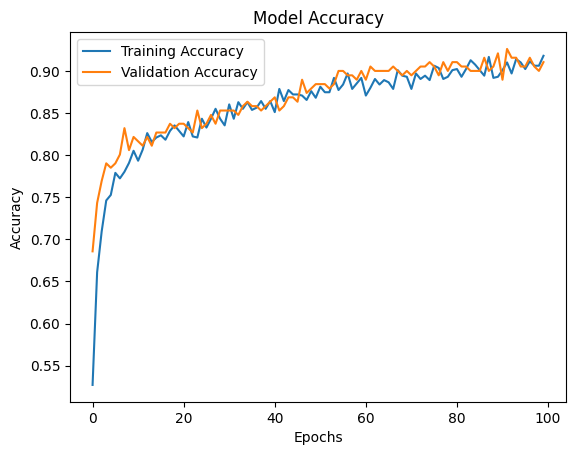

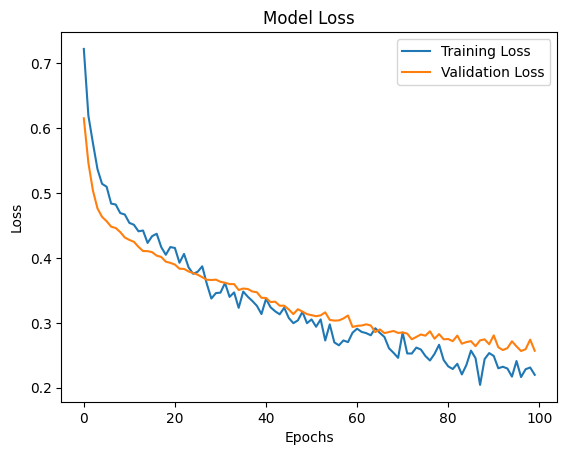

In [107]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [108]:
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN', 'SVM', 'DNN']
accuracies = [accuracy, rf_accuracy, lr_accuracy, knn_accuracy, svm_accuracy, dnn_accuracy]

# Create a summary of the accuracies
accuracy_summary = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies
})

print(accuracy_summary)


                 Model  Accuracy
0        Decision Tree  0.874346
1        Random Forest  0.926702
2  Logistic Regression  0.853403
3                  KNN  0.863874
4                  SVM  0.884817
5                  DNN  0.916230
